**Hola!**

Mi nombre es Maria Efimova, voy a revisar tu proyecto. Encantada de conocerte :)
Está bien si hablamos en 'Tú'? Por favor, dime si eso no está bien para tí, lo cambiaremos.

Mi trabajo no es señalar los errores que cometiste, sino compartir mi experiencia y ayudarte a convertirte en analista de datos. Ya has trabajado mucho en el proyecto, pero vamos a hacerlo aún mejor. A continuación encontrará mis comentarios; no los mueva, modifique ni elimine. Usaré marcas de color:


<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.

</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

Vamos a trabajar en el proyecto en un diálogo: si cambias algo en el proyecto o respondes a mis comentarios, escribe sobre eso. Será más fácil para mí seguir los cambios si resaltas tus comentarios asi:
<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.
 

Recuerde que, si quieres dejarme un comentario en alguna parte del documento, sólo tiene que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como estas puede dejarme sus comentarios" por su propio comentario. Asegúrese sólamente que la celda donde usted vaya a incluir su comentario esté en formato "Markdown".

Respecto del proceso de revisión, esta es la <b>primera iteración</b> para este ejercicio. Su proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos. Al final de este Notebook encontrará comentarios con mis observaciones finales.

# Proyecto 4
¡Hola! Mi nombre es Fernando Ponce y he sido contratado por Megaline para llevar a cabo un proyecto de análisis. Como analista de la empresa, me han encargado determinar qué tarifa de prepago genera más ingresos entre Surf y Ultimate, con el fin de ajustar el presupuesto de publicidad.

En este proyecto, realizaré un análisis preliminar basado en una muestra de 500 clientes de Megaline. Tendré acceso a datos importantes, como quiénes son los clientes, de dónde provienen, qué tarifa utilizan y la cantidad de llamadas y mensajes de texto que realizaron en 2018.

Las dos tarifas que quiero analizar son Surf y Ultimate. 

+ La tarifa Surf tiene un pago mensual de 20USD, que incluye 500 minutos, 50 SMS y 15 GB de datos. Si los clientes exceden estos límites, se les cobrará adicionalmente: 3 centavos por minuto, 3 centavos por SMS y 10USD por cada GB de datos.

+ La tarifa Ultimate tiene un pago mensual de 70USD, con una oferta de 3000 minutos, 1000 SMS y 30 GB de datos. Si los clientes exceden estos límites, los cargos adicionales serán: 1 centavo por minuto, 1 centavo por SMS y 7USD por cada GB de datos.

Mi tarea es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos para Megaline. 

# Tabla de Contenidos

1. [Introducción](#01introduccion)
2. [Preparación de Datos](#preparacion-de-datos)
    + [Importación de datos](#01importacion) 
    + [Inspección de llamadas (df calls)](#inspeccioncalls)
    + [Inspección de internet (df internet)](#inspeccioninternet)
    + [Inspección de mensajes (df messages)](#inspeccionmessages)
    + [Inspección de planes (df plans)](#inspeccionplans)
    + [Inspección de usuarios (df users)](#inspeccionusers)
    
3. [Agrupación de Datos](#agrupardatos)
4. [Remover datos nulos](#removernulos)
5. [Análisis exploratorio de datos EDA](#eda)
     + [Llamadas](#llamadas)
     + [Mensajes](#mensajes)
     + [Volumen](#volumen)
     + [Valores Atípicos](#atipicos)
6. [Prueba de Hipótesis](#hipotesis)
7. [Conclusiones](#conclusion)


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial que empecamos con el plan todo

## Introducción <a class="anchor" id="01introduccion"></a>


## Preparación de Datos <a class="anchor" id="preparacion-de-datos"></a>

>Si se usa anaconda se debe tener instalado previamente en el terminal conda `pip list`

En esta sección, realizaremos el análisis de datos y presentaremos los resultados obtenidos.




### Importar las librerias que se usaran <a class="anchor" id="01importacion"></a>



In [2004]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats as st



### Importar los datos <a class="anchor" id="01importacion"></a>
#### Paso 1. Abrir el archivo de datos y estudia la información general

Rutas de archivos:

```python
/datasets/megaline_calls.csv Descarga el dataset
/datasets/megaline_internet.csv Descarga el dataset
/datasets/megaline_messages.csv Descarga el dataset
/datasets/megaline_plans.csv Descarga el dataset
/datasets/megaline_users.csv Descarga el dataset
```
Teniendo las rutas de los archivos importamos con el siguiente codigo:

In [2005]:

# Cargar otros DataFrames
try:
    calls_df = pd.read_csv('megaline_calls.csv')
    internet_df = pd.read_csv('megaline_internet.csv')    
    messages_df = pd.read_csv('megaline_messages.csv')    
    plans_df = pd.read_csv('megaline_plans.csv')    
    users_df = pd.read_csv('megaline_users.csv')    
    
except:
    calls_df = pd.read_csv('/datasets/megaline_calls.csv')
    internet_df = pd.read_csv('/datasets/megaline_internet.csv')
    messages_df = pd.read_csv('/datasets/megaline_messages.csv')
    plans_df = pd.read_csv('/datasets/megaline_plans.csv')
    users_df = pd.read_csv('/datasets/megaline_users.csv')
    
    
    



# Paso 2. Prepara los datos
Convertir los datos en los tipos necesarios. Encontrar y eliminar errores en los datos. 

Explicar qué errores se encontraron y cómo se eliminaron. Nota: muchas llamadas tienen duración de 0.0 minutos. 
Estas pueden ser llamadas perdidas.

Decidir si se quieren preprocesar o no estos valores; evaluar cuánto afectaría su ausencia a los resultados del análisis. 

Para cada usuario, buscar: 
+ El número de llamadas realizadas y minutos utilizados al mes.
+ La cantidad de los SMS enviados por mes.
+ El volumen de datos por mes. 
+ Los ingresos mensuales de cada usuario (restar el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplicar el resultado por el valor de tarifa de llamadas; agregar el cargo mensual según la tarifa de llamadas).

#### Preparando DF llamadas  <a class="anchor" id="inspeccioncalls"></a> 

In [2006]:
print("*HEAD*\n")
calls_df.head()

*HEAD*



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [2007]:

print("\n*DESCRIBE*\n")
print(calls_df.describe())
print("\n *INFO* \n")
len_original_calls_df=len(calls_df)
calls_df.info()


*DESCRIBE*

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

 *INFO* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


> Podemos ver que las llamadas donde la duracion es igual a 0 , son llamadas perdidas por lo que lo descartamos.


In [2008]:
calls_df=calls_df[calls_df['duration']>0.00001]

In [2009]:
print("\n *DESCRIBE* \n ")
print(calls_df.describe())
print("\n *INFO* \n ")
len_modificado_calls_df=len(calls_df)
calls_df.info()


 *DESCRIBE* 
 
             user_id       duration
count  110901.000000  110901.000000
mean     1247.511871       8.378196
std       139.475249       5.354567
min      1000.000000       0.010000
25%      1127.000000       4.150000
50%      1247.000000       7.710000
75%      1365.000000      11.820000
max      1499.000000      37.600000

 *INFO* 
 
<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [2010]:
#codigo para ver caul porcentaje se perdio del dataframe original (calls)
porcentaje_calls_df=abs(len_modificado_calls_df-len_original_calls_df)/len_original_calls_df

print(f"El porcentaje de valores limpiado respecto al original es: {porcentaje_calls_df:.2%}")

El porcentaje de valores limpiado respecto al original es: 19.48%


> Podemos ver que ya se descarto las llamadas de valor cero minutos o lamadas perdidas

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial, aqui todo bien

#### Preparando DF internet <a class="anchor" id="inspeccioninternet"></a> 


In [2011]:
print("*HEAD*\n ")
internet_df.head()

*HEAD*
 


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [2012]:

print("\n *DESCRIBE* \n")
print(internet_df.describe())
print("\n *INFO* \n" )
len_original_internet_df=len(internet_df)
internet_df.info()


 *DESCRIBE* 

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

 *INFO* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


> Vemos que hay valores que usa 0 MB , por lo que decartamos.

In [2013]:
internet_df=internet_df[internet_df['mb_used']>0.00001]

In [2014]:
print("\n *DESCRIBE* \n")
print(internet_df.describe())
print("\n *INFO* \n")
len_modificado_internet_df=len(internet_df)
internet_df.info()


 *DESCRIBE* 

            user_id       mb_used
count  91078.000000  91078.000000
mean    1242.576923    422.064206
std      141.992374    255.063501
min     1000.000000      0.010000
25%     1122.000000    223.380000
50%     1236.000000    395.905000
75%     1367.000000    588.367500
max     1499.000000   1693.470000

 *INFO* 

<class 'pandas.core.frame.DataFrame'>
Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            91078 non-null  object 
 1   user_id       91078 non-null  int64  
 2   session_date  91078 non-null  object 
 3   mb_used       91078 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [2015]:
#codigo para ver caul porcentaje se perdio del dataframe original (internet)
porcentaje_internet_df=abs(len_modificado_internet_df-len_original_internet_df)/len_original_internet_df

print(f"El porcentaje de valores limpiado respecto al original es: {porcentaje_internet_df:.2%}")

El porcentaje de valores limpiado respecto al original es: 13.11%


#### Preparando DF messages <a class="anchor" id="inspeccionmessages"></a> 


In [2016]:
print("*HEAD* \n")
messages_df.head()

*HEAD* 



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [2017]:
print("\n *DESCRIBE* \n")
print(messages_df.describe())
print("\n *INFO* \n ")
len_original_messages_df=len(messages_df)
messages_df.info()


 *DESCRIBE* 

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

 *INFO* 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


> Vemos que no hay valores que pueden ser descartados en este DT , por lo que podriamos usar la fecha despues.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Todo bien con esta parte

#### Preparando DF plans <a class="anchor" id="#inspeccionplans"></a> 


In [2018]:
print("*HEAD* \n ")
plans_df.head()

*HEAD* 
 


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [2019]:

print("*DESCRIBE* \n ")
print(plans_df.describe())
print("\n *INFO* \n")
len_original_plans_df=len(plans_df)
plans_df.info()

*DESCRIBE* 
 
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000        0.010000  
25%          3

> Observamos que son los planes y solo tiene 2 registros por lo que este Data Frame no necestia tratamiento

#### Preparando DF users <a class="anchor" id="#inspeccionusers"></a> 


In [2020]:
print(" *HEAD* /n")
users_df.head()


 *HEAD* /n


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [2021]:
print("*DESCRIBE* \n")
print(users_df.describe())
print("\n *INFO*\n")
len_original_users_df=len(users_df)
users_df.info()

*DESCRIBE* 

           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000

 *INFO*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


> En este caso no hay necesidad de tratar la edad.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial!

### 3. Agrupar datos <a class="anchor" id="agrupardatos"></a> 

Ahora vamos a agrupar los dato por mes en base de la fecha de los dataframes.

#### Creamos la columna month

In [2022]:
# Crear un una nueva fila llamada month 
calls_df['month'] = pd.to_datetime(calls_df['call_date']).dt.month
messages_df['month'] = pd.to_datetime(messages_df['message_date']).dt.month
internet_df['month'] = pd.to_datetime(internet_df['session_date']).dt.month


In [2023]:
calls_df.head(1)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12


In [2024]:
messages_df.head(1)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12


In [2025]:
internet_df.head(1)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12


> Podemos apreciar que se creo una nueva columna en cada dataframe , esta columna "month" respresenta el valor mesnual del mes [0-12]

Creamos una funcion que agrupe los valores de las llamadas, mensajes y MB usados, en este caso agruparemos por `user_id` (identificacion de usuario) y por `month` (mes).

In [2026]:
calls_grouped = calls_df.groupby(['user_id', 'month']).agg({'duration': 'sum','id': 'count'})
calls_grouped = calls_grouped.rename(columns={'duration': 'calls_duration'})
calls_grouped = calls_grouped.rename(columns={'id': 'calls_count'})


messages_grouped = messages_df.groupby(['user_id', 'month']).agg({'id': 'count'})
messages_grouped = messages_grouped.rename(columns={'id': 'sms_count'})

internet_grouped = internet_df.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [2027]:
calls_grouped.head(15)

calls_duration  calls_count
user_id month                             
1000    12             116.83           16
1001    8              171.14           22
        9              297.69           38
        10             374.11           47
        11             404.59           49
        12             392.93           46
1002    10              54.13            8
        11             359.76           48
        12             363.24           38
1003    12            1041.00          118
1004    5              181.58           19
        6              261.32           33
        7              358.45           45
        8              334.86           42
        9              284.60           32

In [2028]:
messages_grouped.head(15)

sms_count
user_id month           
1000    12            11
1001    8             30
        9             44
        10            53
        11            36
        12            44
1002    10            15
        11            32
        12            41
1003    12            50
1004    5              7
        6             18
        7             26
        8             25
        9             21

In [2029]:
internet_grouped.head(15)

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
        12     19369.18
1002    10      6552.01
        11     19345.08
        12     14396.24
1003    12     27044.14
1004    5       6547.21
        6      20672.82
        7      24516.62
        8      27981.74
        9      18852.72

Unimos el dataframe en uno solo 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui bien!

In [2030]:
## Unir los DataFrames en uno solo
user_data = pd.concat([calls_grouped, messages_grouped, internet_grouped], axis=1)

In [2031]:
user_data.head(15)

calls_duration  calls_count  sms_count   mb_used
user_id month                                                  
1000    12             116.83         16.0       11.0   1901.47
1001    8              171.14         22.0       30.0   6919.15
        9              297.69         38.0       44.0  13314.82
        10             374.11         47.0       53.0  22330.49
        11             404.59         49.0       36.0  18504.30
        12             392.93         46.0       44.0  19369.18
1002    10              54.13          8.0       15.0   6552.01
        11             359.76         48.0       32.0  19345.08
        12             363.24         38.0       41.0  14396.24
1003    12            1041.00        118.0       50.0  27044.14
1004    5              181.58         19.0        7.0   6547.21
        6              261.32         33.0       18.0  20672.82
        7              358.45         45.0       26.0  24516.62
        8              334.86         42.0       25.0  27981.74
        9              284.60         32.0       21.0  18852.72

> Podemos ver que ya se ha unido por meses e ID de usuario .

A continuación tenemos que unir con la tabla de usuarios y el plan.
Como el DataFrame de los Usuarios tiene mas en común con la talba de plan.

In [2032]:
# creamos un dataframe que solo usa las filas que nos inportan
user_plan_df = users_df[['user_id','plan','city']]
# hacemos un merge con left y right ya que los dataframes tienen los parametros con diferentes nombre
# se hace un drop para mantener una sola columna que haga referencia al plan
user_plan_df  = (user_plan_df.merge(plans_df, left_on='plan', right_on='plan_name')).drop(columns='plan_name')

In [2033]:
user_plan_df.head(10)

,user_id,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1006,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01
2,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01
3,1011,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01
4,1013,ultimate,"Knoxville, TN MSA",1000,30720,3000,70,7,0.01,0.01
5,1025,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
6,1026,ultimate,"Houston-The Woodlands-Sugar Land, TX MSA",1000,30720,3000,70,7,0.01,0.01
7,1028,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",1000,30720,3000,70,7,0.01,0.01
8,1030,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30720,3000,70,7,0.01,0.01
9,1031,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muy bien que muestras todo en DataFrame!

Ahora que los planes y los usuarios estan funcionados podemos unir con los meses de llamadas , mensajes e internet

In [2034]:
### al usar merge se pierde el valor de month por lo que se debe de resetear para que no exista los subíndices
user_data.reset_index(inplace=True)

user_data = user_data.merge(user_plan_df, on='user_id', how='left')




### 4. Remover datos nulos  <a class="anchor" id="removernulos"></a> 

In [2035]:
user_data

,user_id,month,calls_duration,calls_count,sms_count,mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,116.83,16.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,8,171.14,22.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,9,297.69,38.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,10,374.11,47.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,11,404.59,49.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,290.06,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01
2289,1482,10,NaN,NaN,2.0,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01
2290,1094,10,NaN,NaN,NaN,1728.71,surf,"Los Angeles-Long Beach-Anaheim, CA MSA",50,15360,500,20,10,0.03,0.03
2291,1108,12,NaN,NaN,NaN,233.17,ultimate,"Salt Lake City, UT MSA",1000,30720,3000,70,7,0.01,0.01


> podemos ver que hay valores nulos y por lo tanto hay que tratarlos debidamente.

En este caso vamos a remplazar los valores nulos

In [2036]:
print("Valores nulos por columna:")
user_data.isnull().sum()

Valores nulos por columna:


user_id                    0
month                      0
calls_duration            37
calls_count               37
sms_count                487
mb_used                   16
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
dtype: int64

> Vamos a tratar estos valores nulos medianque una fucnion que reemplace el valor nulo con 0.

In [2037]:
# Esta columna llena los valores vacios con 0.
for col in ['calls_duration','calls_duration','calls_count','sms_count','mb_used']:
    user_data[col] = user_data[col].fillna(0)

In [2038]:
print("Valores nulos por columna:")
user_data.isnull().sum()

Valores nulos por columna:


user_id                  0
month                    0
calls_duration           0
calls_count              0
sms_count                0
mb_used                  0
plan                     0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dtype: int64

> Podemos apreciar que no hay valores nulos , por lo que damos por terminado el proceso de limpieza de datos y ahora falta aumentar la columna de `beneficio por mes`.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui bien!

### Agregar columna Beneficio Mensual `profit`

Para Los ingresos mensuales de cada usuario se va Restar el límite del paquete gratuito del número total de llamadas, SMS y datos. Multiplicar el resultado por el valor de la tarifa de llamadas. Agregar el cargo mensual según la tarifa de llamadas a los ingresos mensuales de cada usuario.




In [2039]:
user_data.head()

,user_id,month,calls_duration,calls_count,sms_count,mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,116.83,16.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,8,171.14,22.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,9,297.69,38.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,10,374.11,47.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,11,404.59,49.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03


Hacemos la funcion que calcule el valor de llamada , mensage y megas y hacemos el calculo para obtener el beneficio mensual `profit` 

In [2040]:
def calculate_monthly_profit(row):
    # Ingresos por llamadas
    calls_profit = max(0, row['calls_duration'] - row['minutes_included']) * row['usd_per_minute']
    
    # Ingresos por mensajes
    messages_profit = max(0, row['sms_count'] - row['messages_included']) * row['usd_per_message']
    
    # Ingresos por uso de internet
    internet_profit = max(0, (row['mb_used'] - row['mb_per_month_included']) / 1000) * row['usd_per_gb']
    
    # Total de ingresos
    total_profit = calls_profit + messages_profit + internet_profit + row['usd_monthly_pay']
    
    return total_profit





<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Funciona correcto!

Probamos la funcioncon un registro

In [2041]:
# Cambia el índice [0] por el número de fila que quieras evaluar , para evaluar cualquier otro registro sustituir el valor[]
registro = user_data.iloc[0]  
profit_para_registro = calculate_monthly_profit(registro)

print("Monthly Profit para el registro seleccionado:", profit_para_registro)

Monthly Profit para el registro seleccionado: 70.0


> Ahora que probamos la funicon le aplicamos en el Dataframe

In [2042]:
user_data['monthly_profit'] = user_data.apply(calculate_monthly_profit, axis=1)
user_data.head()

,user_id,month,calls_duration,calls_count,sms_count,mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1000,12,116.83,16.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.0000
1,1001,8,171.14,22.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0000
2,1001,9,297.69,38.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0000
3,1001,10,374.11,47.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,89.7949
4,1001,11,404.59,49.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,51.4430


> Podemos apreciar que se creo la columna `monthly profit` por lo cual ya se puede hacer la base para el analisis que pide el enunciado

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui bien!

### Análisis exploratorio de datos EDA <a class="anchor" id="eda"></a> 

En esta seccion vamos a analizar los datos que trabajaremos , graficaremos  y buscaremos descartar valores atípicos que puedan existir. 

Vamos a ver cual de los 2 planes genera más ingesos. Por lo que separaremos los dataframes en los que tienen plan de surf y plan ultimate. 

In [2043]:
df_surf = user_data[user_data['plan'] == 'surf']
df_ultimate = user_data[user_data['plan'] == 'ultimate']

tamanio_surf = df_surf.shape
tamanio_ultimate = df_ultimate.shape

print(f"Tamaño de df_surf:\n{tamanio_surf}")
print(f"Tamaño de df_ultimate:\n{tamanio_ultimate}")


Tamaño de df_surf:
(1573, 16)
Tamaño de df_ultimate:
(720, 16)


In [2044]:
total_profit_surf = df_surf['monthly_profit'].sum()
total_profit_ultimate = df_ultimate['monthly_profit'].sum()

print(f"Total de profit en df_surf: {total_profit_surf:.2f}")
print(f"Total de profit en df_ultimate: {total_profit_ultimate:.2f}")


Total de profit en df_surf: 91467.80
Total de profit en df_ultimate: 51960.14


>Observamos que el que que genera en total mas ingresos es el plan surf porque tiene mas ususarios.

### Representación visual de ingresos mensuales

#### Ingresos del plan surf mensual


In [2045]:
df_surf_profit = df_surf.groupby(['plan','month'])['monthly_profit'].sum().reset_index()


#### Ingresos del plan ultimate mensual

In [2046]:
df_ultimate_profit = df_ultimate.groupby(['plan','month'])['monthly_profit'].sum().reset_index()

#### Comparando ambos planes de ingresos


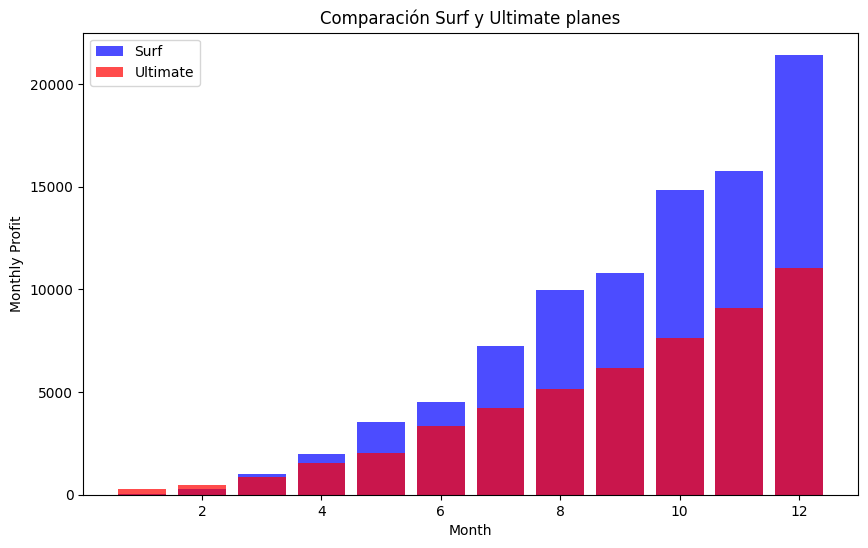

In [2047]:


# Crea un gráfico de barras para el plan "Surf" (en azul) y el plan "Ultimate" (en rojo) en el mismo gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_surf_profit['month'], df_surf_profit['monthly_profit'], color='blue', label='Surf',alpha=0.7)
plt.bar(df_ultimate_profit['month'], df_ultimate_profit['monthly_profit'], color='red', label='Ultimate', alpha=0.7)  # Utiliza alpha para hacer las barras transparentes

plt.title('Comparación Surf y Ultimate planes')
plt.xlabel('Month')
plt.ylabel('Monthly Profit')
plt.legend()
plt.show()


> Observamos en el histograma la comparación y podemos ver que se tiene mas ingresos por el plan Surf.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Me gusta mucho el grafico! Muy bien que anadiste el titulo aqui!

#### Función para graficar 

En esta funcion vamos a graficar histogramas de los dataframes y una columna especifica. También va a calcular la media , mediana y std , esos valores representativos se mostrarán en el gráfico.

In [2048]:
def plot_histogram_and_stats(df, column_name):
    # Obtener el nombre del plan desde el DataFrame
    plan_name = df['plan'].iloc[0]

    # Crear el histograma
    df.hist(column_name)
    plt.title(f'Histograma de {column_name} (Plan "{plan_name}")')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')

    # Calcular y mostrar la media, mediana y desviación estándar
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    std_value = df[column_name].std()

    # Agregar líneas verticales para representar la media, mediana y desviación estándar
    plt.axvline(mean_value, color='red', linestyle='-', label=f'Mean: {mean_value:.0f}')
    plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.0f}')
    plt.axvline(median_value - std_value, color='green', linestyle='-', label=f'Standard Deviation -: {std_value:.0f}')
    plt.axvline(median_value + std_value, color='green', linestyle='-', label=f'Standard Deviation +: {std_value:.0f}')

    # Mostrar el gráfico con leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()




#### Histograma llamadas  <a class="anchor" id="llamadas"></a> 

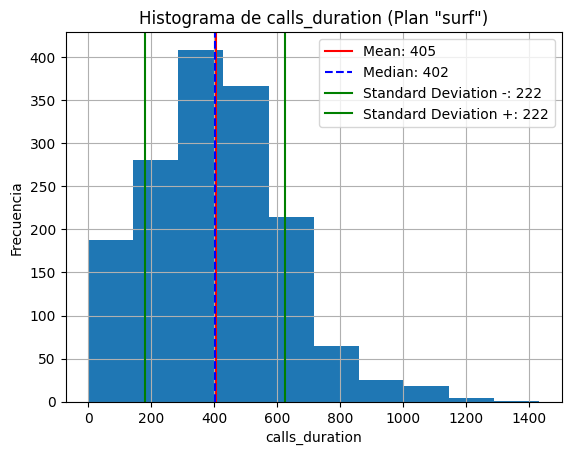

In [2049]:
plot_histogram_and_stats(df_surf, 'calls_duration')

> Apreciamos que en la duración de llamadas en minutos del plan Surf tiene como media `405` ,mediana `402` y std `222`.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial!

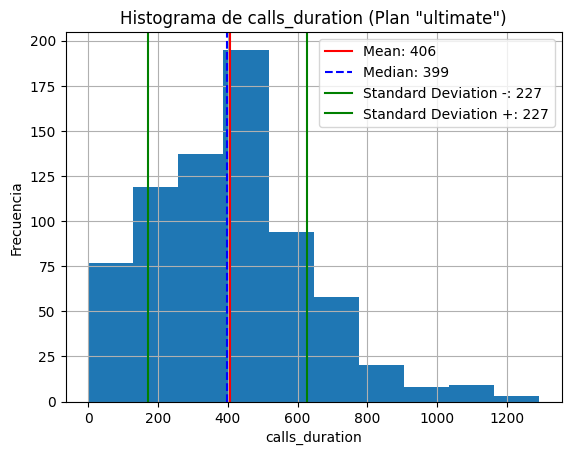

In [2050]:
plot_histogram_and_stats(df_ultimate, 'calls_duration')

> Apreciamos que en la duración de llamadas en minutos del plan Ultimate tiene como media `406` ,mediana `399` y std `277`.

#### Histograma mensajes <a class="anchor" id="mensajes"></a> 

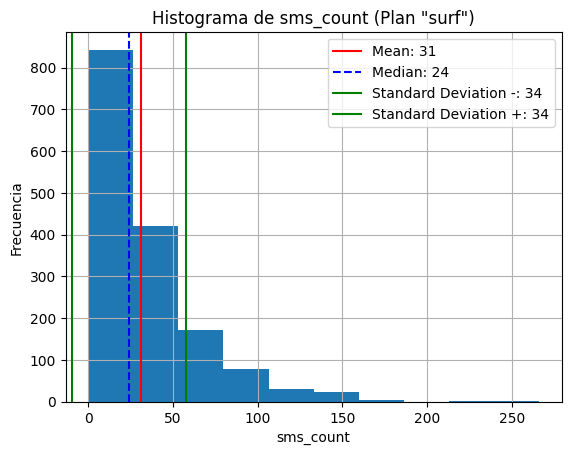

In [2051]:
plot_histogram_and_stats(df_surf, 'sms_count')

> Apreciamos que en el número de mensajes en el plan Surf tiene como media `31` ,mediana `24` y std `34`.

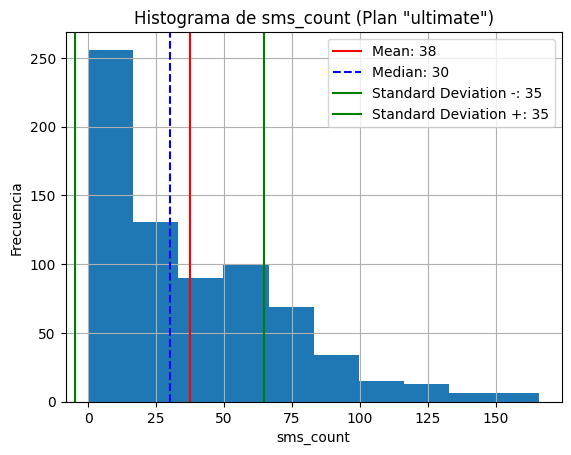

In [2052]:
plot_histogram_and_stats(df_ultimate, 'sms_count')

> Apreciamos que en el número de mensajes en el plan Ultimate tiene como media `38` ,mediana `30` y std `35`.

#### Histograma de volumen de datos (internet) <a class="anchor" id="internet"></a> 

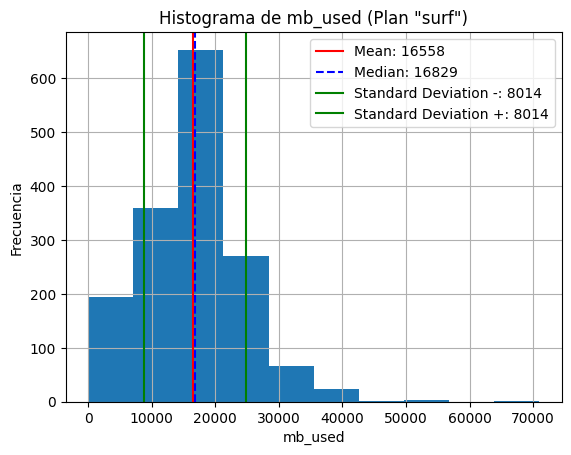

In [2053]:
plot_histogram_and_stats(df_surf, 'mb_used')

> Apreciamos que en volumen de datos utilizados en el plan Surf tiene como media `16558` ,mediana `16829` y std `8014`.

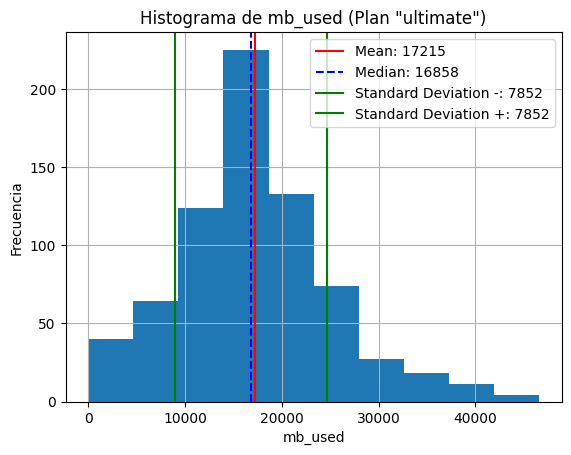

In [2054]:
plot_histogram_and_stats(df_ultimate, 'mb_used')

> Apreciamos que en volumen de datos utilizados en el plan Ultimate tiene como media `17215` ,mediana `116858` y std `7852`.

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Te pido anadir aqui los conclusiones despues de los graficos!

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo. Se agredo una pequeña descripción de cada grafico por debajo</div>

### Valores Atípicos <a class="anchor" id="atipicos"></a> 

#### Diagrama de caja llamadas
Con esto vamos a ver si existen valores atipicos para extraer.
En este caso solo existe valores atipicos de la parte superior.

Realizamos una funcion que haga el diagrama de cajas y calcule el limite superior que despues vamos a guardar.

In [2055]:
def plot_boxplot_and_upper_limit(df, column_name):
    # Obtener el nombre del plan desde el DataFrame
    plan_name = df['plan'].iloc[0]

    # Crear el diagrama de cajas
    df.boxplot(column=column_name)
    plt.title(f'Diagrama de Cajas de {column_name} (Plan "{plan_name}")')
    plt.ylabel(column_name)

    # Calcular el límite superior
    q25 = df[column_name].quantile(0.25)
    q75 = df[column_name].quantile(0.75)
    iqr = q75 - q25
    # Calcular el valor de corte para los valores atípicos y el límite superior
    cut_off = iqr * 1.5
    upper_limit = q75 + cut_off
    # Mostrar el gráfico
    plt.show()
    retorno=(f"{column_name} upper limit {plan_name}: ",upper_limit)
    print(retorno)

    # Devolver el límite superior en un diccionario con el nombre de la columna
    return retorno



 


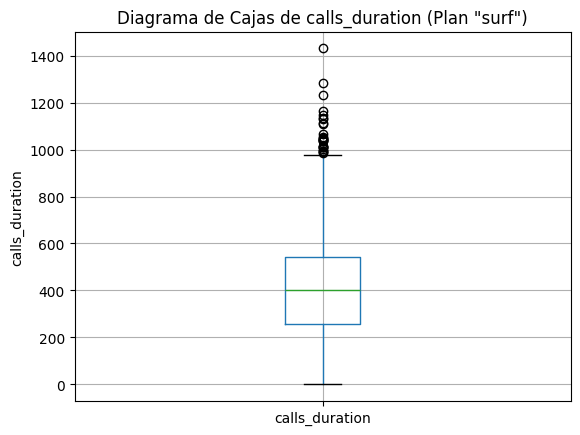

('calls_duration upper limit surf: ', 975.9950000000001)


In [2056]:

lim_sup_calls_surf=plot_boxplot_and_upper_limit(df_surf, 'calls_duration')[1]


> Apreciamos que existe valores atípicos dentro de la duración de las llamadas como 1400 minutos , que da convertido a horas da aproximadamente 23 horas , en este caso se descartara cualquier valor que sea mayor de `975.99 minutos` en el plan Surf. 

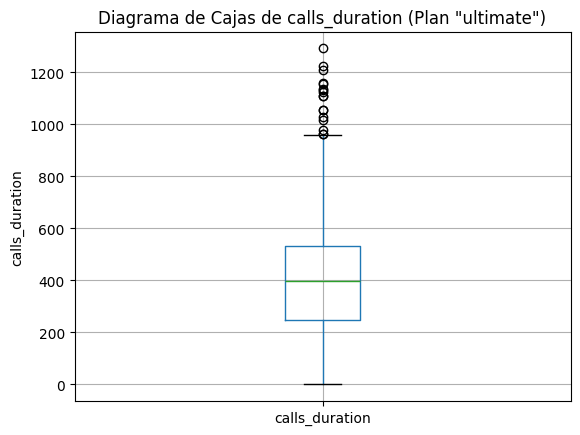

('calls_duration upper limit ultimate: ', 961.1337499999998)


In [2057]:

lim_sup_calls_ultimate=plot_boxplot_and_upper_limit(df_ultimate, 'calls_duration')[1]


> Apreciamos que existe valores atípicos dentro de la duración de las llamadas como 1200 minutos , que da convertido a horas da aproximadamente 20 horas , en este caso se descartara cualquier valor que sea mayor de `961.13 minutos` en el plan Ultimate. 

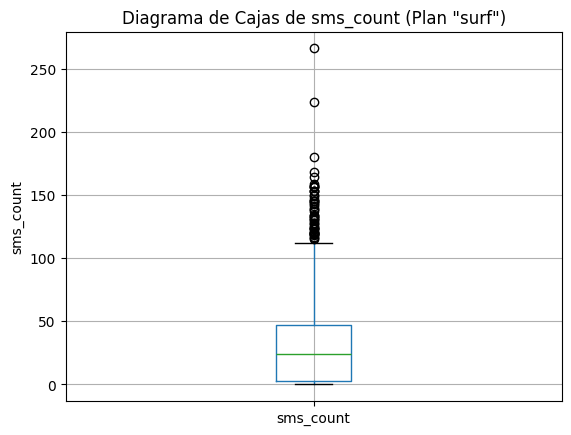

('sms_count upper limit surf: ', 113.0)


In [2058]:

lim_sup_sms_surf=plot_boxplot_and_upper_limit(df_surf, 'sms_count')[1]


> Apreciamos que existe valores atipicos dentro de la del número de mensajes enviados`sms_count` , en este caso se descartara cualquier valor que sea mayor de `113 mensajes` en el plan Surf. 

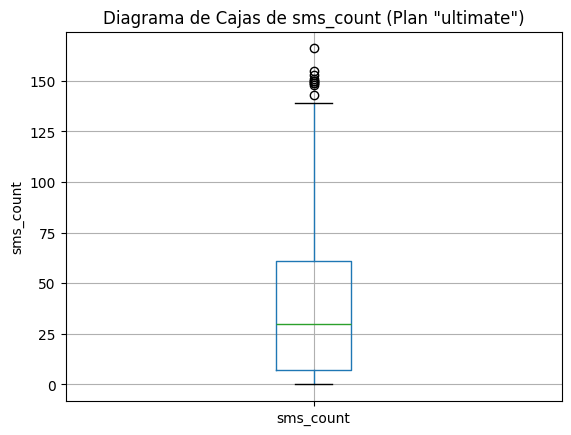

('sms_count upper limit ultimate: ', 142.0)


In [2059]:

lim_sup_sms_ultimate=plot_boxplot_and_upper_limit(df_ultimate, 'sms_count')[1]


> Apreciamos que existe valores atipicos dentro de la del número de mensajes enviados`sms_count` , en este caso se descartara cualquier valor que sea mayor de `142 mensajes` en el plan Ultimate. 

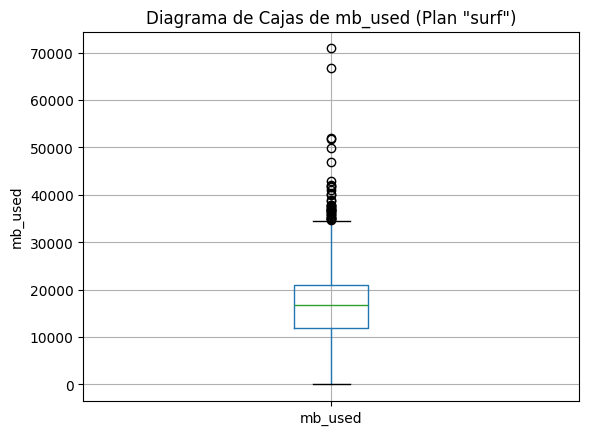

('mb_used upper limit surf: ', 34519.245)


In [2060]:
lim_sup_mb_used_surf=plot_boxplot_and_upper_limit(df_surf, 'mb_used')[1]


> Apreciamos que existe valores atípicos dentro del volumen de datos utilizados `mb_used` , en este caso se descartara cualquier valor que sea mayor de `34519.245 MB` en el plan Surf. 

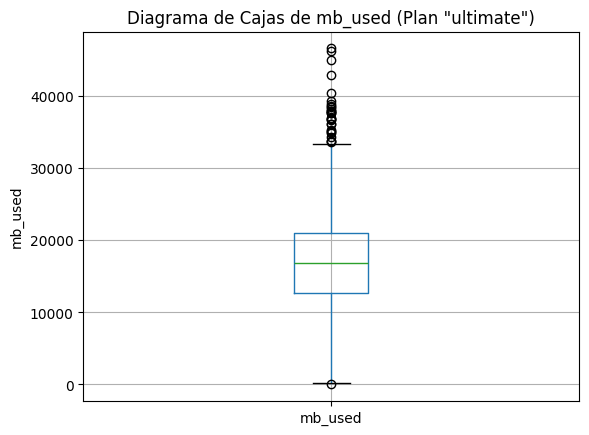

('mb_used upper limit ultimate: ', 33535.886249999996)


In [2061]:
lim_sup_mb_used_ultimate=plot_boxplot_and_upper_limit(df_ultimate, 'mb_used')[1]

> Apreciamos que existe valores atípicos dentro del volumen de datos utilizados `mb_used` , en este caso se descartara cualquier valor que sea mayor de `33535.886 MB` en el plan Surf. 

In [2062]:
print("\n Cambio en volumen de datos si aplicando limite superior en Data frame de Surf")
print(df_surf.shape)
df_surf = df_surf.query('calls_duration < @lim_sup_calls_surf and sms_count < @lim_sup_sms_surf and mb_used < @lim_sup_mb_used_surf')
print(df_surf.shape)


 Cambio en volumen de datos si aplicando limite superior en Data frame de Surf
(1573, 16)
(1475, 16)


In [2063]:
# Filtrado en df_ultimate
print("\nCambio en volumen de datos si aplicando límite superior en DataFrame de Ultimate")
print(df_ultimate.shape)
df_ultimate = df_ultimate.query('calls_duration < @lim_sup_calls_ultimate and sms_count < @lim_sup_sms_ultimate and mb_used < @lim_sup_mb_used_ultimate')
print(df_ultimate.shape)


Cambio en volumen de datos si aplicando límite superior en DataFrame de Ultimate
(720, 16)
(665, 16)


<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Te pido anadir aqui los conclusiones despues de los graficos!

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo. igual que en los histogramas , se agrego un comentario en cada diagrama de cajas explicando el limite que se usara como filtro adelante</div>

> Podemos concluir que los datos estan limpios de valores atípicos.

## Prueba de Hipótesis <a class="anchor" id="hipotesis"></a>

Dentro de nuestro proyecto debemos probar 2 hipótesis
* Caso 1: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
* caso2 : El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

En cada caso vamos a escoger el grado de significancia del 5%.

### Caso 1: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.




+ ### Planteamiento 1 (Bilateral)
 
__Hipótesis Nula (H0):__ 
El ingreso promedio de los usuarios de las tarifas Ultimate es igual al ingreso promedio de los usuarios de las tarifas Surf. Matemáticamente, esto se expresaría como:


$H_0: \mu_{\text{Ultimate}} = \mu_{\text{Surf}}$


Donde μ_Ultimate representa el ingreso promedio de los usuarios de Ultimate y μ_Surf representa el ingreso promedio de los usuarios de Surf.

__Hipótesis Alternativa (H1):__

El ingreso promedio de los usuarios de las tarifas Ultimate es diferente al ingreso promedio de los usuarios de las tarifas Surf. Matemáticamente, esto se expresaría como:

$H_1: \mu_{\text{Ultimate}} \neq \mu_{\text{Surf}}$

In [2064]:
sample_1 = df_surf['monthly_profit']
sample_2 = df_ultimate['monthly_profit']

In [2065]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=551.36695623861, pvalue=1.154835161358275e-108)

> en este caso como los planes son de diferentes valores vamos a dar el valor `False` en la Variable `equal_var`.

In [2066]:
alpha = 0.05 # critical statistical significance level
                        

results = st.ttest_ind(sample_1,sample_2, equal_var=False)

print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis
alpha_by2=alpha/2
if (results.pvalue < alpha_by2):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  6.601543083989414e-58
We reject the null hypothesis


Por lo tanto concluimos con un margen de error del 5% de que el promedio de ingresos de los usuarios del Plan surf puede ser diferente que los usuarios que contrataron el plan `ultimate`.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial! Si, aqui correcto! Tambien te pido escribir en espanol :)


+ ### Planteamiento 2 (Unilateral)

__Hipótesis Nula (H0):__ 

El ingreso promedio de los usuarios de las tarifas Ultimate es igual al ingreso promedio de los usuarios de las tarifas Surf. Matemáticamente, esto se expresaría como:


$H_0: \mu_{\text{Ultimate}} = \mu_{\text{Surf}}$


Donde μ_Ultimate representa el ingreso promedio de los usuarios de Ultimate y μ_Surf representa el ingreso promedio de los usuarios de Surf.


__Hipótesis Alternativa (H1)__:

El ingreso promedio de los usuarios de las tarifas Surf es menor que el ingreso promedio de los usuarios de las tarifas Ultimate. Matemáticamente, esto se expresaría como:

$H_1: \mu_{\text{Surf}} < \mu_{\text{Ultimate}}$
 

Esta hipótesis alternativa sugiere que estás interesado en determinar si el ingreso promedio de los usuarios de Surf es significativamente menor que el ingreso promedio de los usuarios de Ultimate.

In [2067]:
alpha = 0.05 # critical statistical significance level
                        

results = st.ttest_ind(sample_1,sample_2, equal_var=False ,alternative='less')

print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  3.300771541994707e-58
We reject the null hypothesis


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Trabajas con p-value correcto!

+ ### Planteamiento 3 (Unilateral)

__Hipótesis Nula (H0):__ 

El ingreso promedio de los usuarios de las tarifas Ultimate es igual al ingreso promedio de los usuarios de las tarifas Surf. Matemáticamente, esto se expresaría como:


$H_0: \mu_{\text{Ultimate}} = \mu_{\text{Surf}}$


Donde μ_Ultimate representa el ingreso promedio de los usuarios de Ultimate y μ_Surf representa el ingreso promedio de los usuarios de Surf.


__Hipótesis Alternativa (H1)__:

El ingreso promedio de los usuarios de las tarifas Ultimate es menor que el ingreso promedio de los usuarios de las tarifas Surf. Matemáticamente, esto se expresaría como:

$H_1: \mu_{\text{Ultimate}} < \mu_{\text{Surf}}$


Esta hipótesis alternativa sugiere que estás interesado en determinar si el ingreso promedio de los usuarios de Ultimate es significativamente menor que el ingreso promedio de los usuarios de Surf.

In [2068]:
alpha = 0.05 # critical statistical significance level
                        

results = st.ttest_ind(sample_1,sample_2, equal_var=False ,alternative='greater')

print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  1.0
We retain the null hypothesis


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial!

> Es este caso podemos afirmar con un 95% de certeza que el en promedio , el plan Surf genera mas ingresos que el plan Ultimate.

### Caso 2: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Conbinamos los planes anterior mente separados para crear un data frame que pueda resolver la pregunta si las personas de cierta ciudad se comporta diferen a las de las demas.

In [2069]:
print(df_surf.shape)
print(df_ultimate.shape)
data_users2 = pd.concat([df_surf, df_ultimate], ignore_index=True)
print(data_users2.shape)

(1475, 16)
(665, 16)
(2140, 16)


In [2070]:
data_users2

,user_id,month,calls_duration,calls_count,sms_count,mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1001,8,171.14,22.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0000
1,1001,9,297.69,38.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0000
2,1001,10,374.11,47.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,89.7949
3,1001,11,404.59,49.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,51.4430
4,1001,12,392.93,46.0,44.0,19369.18,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.0918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,1224,6,0.00,0.0,5.0,2966.21,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.0000
2136,1407,11,0.00,0.0,1.0,290.06,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01,70.0000
2137,1482,10,0.00,0.0,2.0,0.00,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01,70.0000
2138,1108,12,0.00,0.0,0.0,233.17,ultimate,"Salt Lake City, UT MSA",1000,30720,3000,70,7,0.01,0.01,70.0000


Creamos el Dataframe y lo separamos en usuarios de la ciudad de Nueva York-Nueva Jersey y las demas.

In [2071]:
ny_nj_users = data_users2[data_users2['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
otras_ciudades_users = data_users2[data_users2['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

In [2072]:
ny_nj_users.shape

(364, 16)

In [2073]:
otras_ciudades_users.shape

(1776, 16)

+ ### Planteamiento 1 (Bilateral)

__Hipótesis Nula (H0):__ El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al ingreso promedio de los usuarios de otras regiones. Matemáticamente, esto se expresaría como:

$H_0: \mu_{\text{NY-NJ}} \neq \mu_{\text{Otras}}$

__Hipótesis Alternativa (H1):__ El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al ingreso promedio de los usuarios de otras regiones. Matemáticamente, esto se expresaría como:

$H_1: \mu_{\text{NY-NJ}} = \mu_{\text{Otras}}$

Donde μ_NY-NJ representa el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey y μ_Otras representa el ingreso promedio de los usuarios de otras regiones.



In [2074]:
sample_3 = ny_nj_users['monthly_profit']
sample_4 = otras_ciudades_users['monthly_profit']

st.levene(sample_3, sample_4)

LeveneResult(statistic=5.6080234258381125, pvalue=0.01796691754872323)

pvalue < 5% sugiere usar  el valor `False` en la Variable `equal_var`.

In [2075]:

alpha = 0.05 # critical statistical significance level
                        

results = st.ttest_ind(sample_3, sample_4,equal_var=False)

print('p-value: ', results.pvalue)
alpha_by_2=alpha/2

# if the p-value is less than alpha, we reject the hypothesis
## en este caso usamos >= porque la hipotesis pide si es diferente y no igual
if (results.pvalue < alpha_by_2):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  0.09085200024176729
We retain the null hypothesis


Podemos Conluir que podemos descartar la Hipotesis que los ciudadanos de `New York-Newark-Jersey City` se comportan de manera diferente a la de los usuarios de las demas ciudades con un 95 % de certeza.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Buen trabajo!

## Conlusión  <a class="anchor" id="conclusion"></a>

Se ha analizado el comportamiento de los clientes de telecomunicaciones para determinar cuál de los dos planes prepago es más rentable y para probar dos hipótesis estadísticas.

Durante la preparacion y limpieza de datos se hizo:
+ Minutos totales utilizados por mes.
+ El número de mensajes de texto enviados por mes.
+ El volumen de datos por mes.
+ La ganancia mensual de cada usuario (restamos el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplicamos el resultado por los números incluidos en el plan y agregamos el cargo mensual del plan).
- Limpiar valores vacios 
- Limpiar valores atipicos
- reemplazar con valores significativos o equitativos.

Despues de lo anterior se agruparon los datos para responder a las siguientes hipotesis pre planteadas y se concluyo que:

+ ##### La ganancia promedio de los usuarios de los planes Ultimate y Surf es diferente , donde Surf genera mas ganancias.
+ ##### La ganancia promedio de los usuarios en el área de NY-NJ es diferente de la de los usuarios de otras regiones.

##### Accion a Tomar
- Se recomienda invertir mas publicidad en el plan de Surf ya que genera mas que el Plan Ultimate.
- No hay que tomar una medida especial con los habitantes de la ciudad de `New York-Newark-Jersey City`con respecto a los demas.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muchas gracias por tu trabajo! Te pido anadir los cocnlusiones despues de los graficos y estoy lista para aceptar tu proyecto!